In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
%matplotlib inline
from sklearn.cluster import DBSCAN, KMeans, MiniBatchKMeans, Birch
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [457]:
data = pd.read_csv("./gk_clean_plus.csv", parse_dates=["datetime"], date_parser=pd.to_datetime)
data = data.groupby(data.datetime)["pwr"].sum()["2018-07-01": "2018-08-01"]
time_index = np.unique(data.index.date).astype(str)

## 聚类算法

#### DBSCAN[1]

Density-Based Spatial Clustering of Applications with Noise

#### Birch
#### KMeans


### reference
1. [Ester, M., H. P. Kriegel, J. Sander, and X. Xu, "A Density-Based
    Algorithm for Discovering Clusters in Large Spatial Databases with Noise".
    In: Proceedings of the 2nd International Conference on Knowledge Discovery
    and Data Mining, Portland, OR, AAAI Press, pp. 226-231. 1996](https://www.ualr.edu/xwxu/publications/kdd-96.pdf)
    
    https://blog.csdn.net/zhouxianen1987/article/details/68945844
    
    https://blog.csdn.net/itplus/article/details/10088625

流程

+ 聚类
+ 模式输出
+ 各类别潜在异常

In [651]:


def plot_cluster(values, values_index):
    """
    Args:
        values type: np.ndarray, shape=(n, 48)
        values_index: type: list or np.ndarray of date_string, shape=n, ["2018-01-01", "2018-01-02", ...]
    """
    def _plot_curve(values, values_timeindex, ax, name):
        ax.set_xticks([0, 12, 24, 36, 48])
        ax.set_xticklabels(["00:00", "06:00", "12:00", "18:00", "24:00"])
        v_mean = values.mean(axis=0)
        v_std = values.std(axis=0)
        ax.fill_between(range(values.shape[1]), v_mean - v_std,
                         v_mean + v_std, alpha=0.1,
                         color="g", label=name)
        ax.plot(range(values.shape[1]), v_mean)
        ax.legend()
        return f
    cluster_labels = Birch().fit(values).labels_
    n_clusters = len(np.unique(cluster_labels))
    f = plt.figure(figsize=(12,8))
    gs = gridspec.GridSpec(n_clusters, 3)
    ax_heatmap = plt.subplot(gs[:, 0])
    ax_heatmap.imshow(pd.get_dummies(cluster_labels).set_index(time_index), aspect="auto")
    ax_heatmap.set_yticks(range(len(values_index)))
    ax_heatmap.set_yticklabels(values_index.astype(str))
    ax_heatmap.set_xticks(range(n_clusters))
    ax_heatmap.set_xticklabels([f'cluster_{i}' for i in range(n_clusters)])
    
    for i in range(n_clusters):
        index_i = (cluster_labels == i)
        ax_i = plt.subplot(gs[i, 1:])
        _plot_curve(data.values.reshape(-1, 48)[index_i], time_index[index_i], ax_i, f'cluster_{i}')

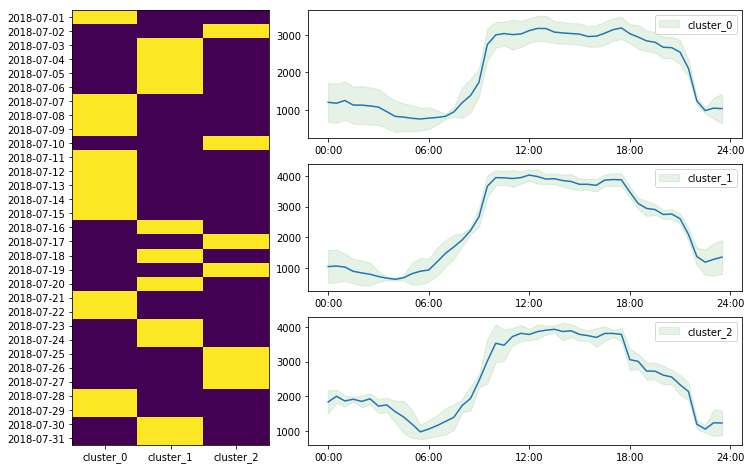

In [650]:
plot_cluster(data.values.reshape(-1, 48), data_index,)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
(48,)


ValueError: x and y must have same first dimension, but have shapes (9,) and (48,)

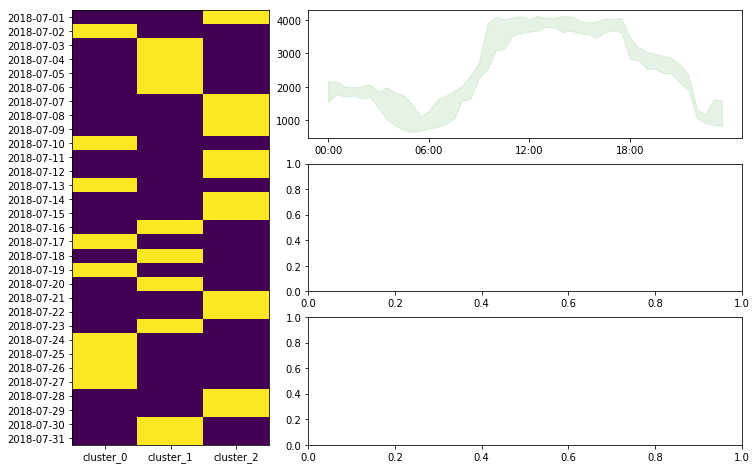

In [614]:
import matplotlib.gridspec as gridspec
f = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(3, 3)
ax_heatmap = plt.subplot(gs[:, 0])
ax1 = plt.subplot(gs[0, 1:])
ax2 = plt.subplot(gs[1, 1:])
ax3 = plt.subplot(gs[2, 1:])

ax_heatmap.imshow(pd.get_dummies(knn.labels_).set_index(time_index), aspect="auto")
# sns.heatmap(pd.get_dummies(knn.labels_).set_index(time_index).values, ax=ax_heatmap)
ax_heatmap.set_yticks(range(len(data_index)))
ax_heatmap.set_yticklabels(data_index.astype(str))

ax_heatmap.set_xticks(range(3))
ax_heatmap.set_xticklabels([f'cluster_{i}' for i in range(3)])

index_0 = (knn.labels_ == 0)
plot_curve(data.values.reshape(-1, 48)[index_0], time_index[index_0], ax1, '0')

index_1 = (knn.labels_ == 1)
plot_curve(data.values.reshape(-1, 48)[index_1], time_index[index_1], ax2, '1')

index_2 = (knn.labels_ == 2)
plot_curve(data.values.reshape(-1, 48)[index_2], time_index[index_2], ax3, '2')

In [437]:
dbscan = DBSCAN(eps=3, min_samples=3).fit(data_scaler)
knn = KMeans(3).fit(data_scaler)
miniknn = MiniBatchKMeans().fit(data_scaler)
birch = Birch().fit(data_scaler)

In [439]:
def plot_cluster_dim_reduction(x, cluster_id, mode="pca"):
    if mode == "pca":
        x_dim_redc = PCA(n_components=2).fit_transform(data_scaler)
    elif mode == "tsne":
        x_dim_redc = TSNE(n_components=2).fit_transform(data_scaler)
    else:
        print("wrone mode")
        return
    f, ax = plt.subplots()
    unique_cid = np.unique(np.array(cluster_id))
    for idx, cid in enumerate(unique_cid):
        idx_bool = np.where(cluster_id==cid)
        ax.scatter(x_dim_redc[idx_bool, 0], x_dim_redc[idx_bool, 1], label=str(cid))
        ax.legend()

In [440]:
def plot_power(x, labels):
    for i in range(x.shape[0]):
        plt.plot(x[i, :], label=labels[i])
    plt.legend()

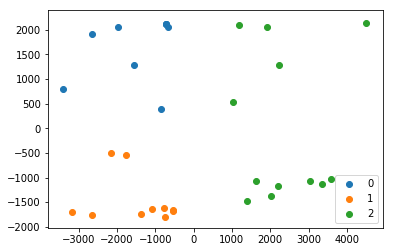

In [441]:
plot_cluster_dim_reduction(data_scaler, knn.labels_, mode="pca")

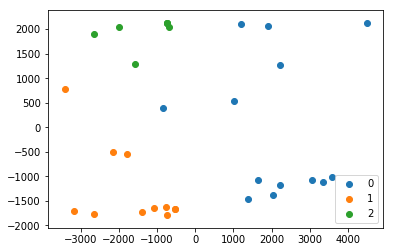

In [442]:
plot_cluster_dim_reduction(data_scaler, birch.labels_, mode='pca')

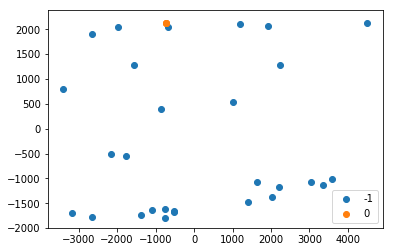

In [443]:
plot_cluster_dim_reduction(data_scaler, dbscan.labels_)

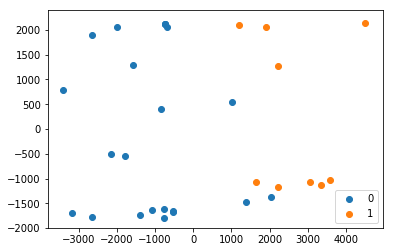

In [444]:
is_holiday = lambda x: 1 if x in [5, 6] else 0
plot_cluster_dim_reduction(data_scaler, list(map(is_holiday, pd.to_datetime(data_index).weekday)))

In [428]:
np.unique(knn.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

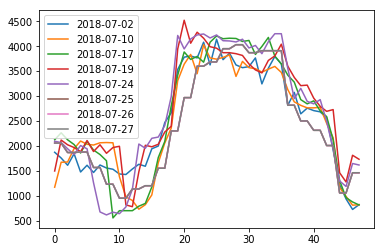

In [422]:
i=0
plot_power(data_scaler[knn.labels_==i], data_index[knn.labels_==i])

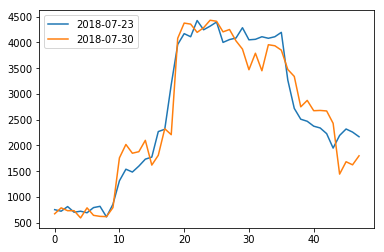

In [423]:
i=1
plot_power(data_scaler[knn.labels_==i], data_index[knn.labels_==i])

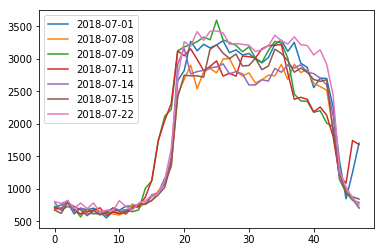

In [424]:
i=2
plot_power(data_scaler[knn.labels_==i], data_index[knn.labels_==i])

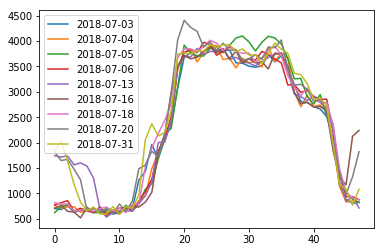

In [425]:
i=3
plot_power(data_scaler[knn.labels_==i], data_index[knn.labels_==i])

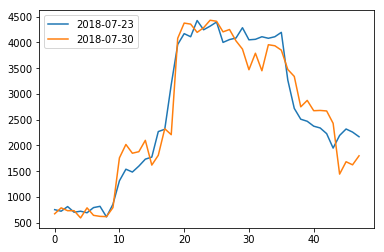

In [429]:
i=1
plot_power(data_scaler[knn.labels_==i], data_index[knn.labels_==i])

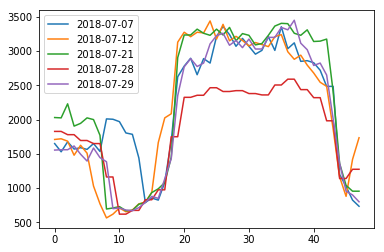

In [427]:
i=4
plot_power(data_scaler[knn.labels_==i], data_index[knn.labels_==i])

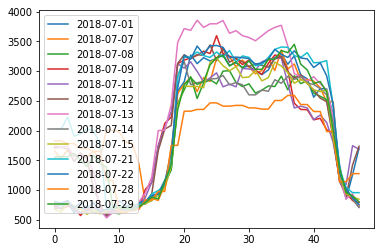

In [418]:
plot_power(data_scaler[birch.labels_==0], data_index[birch.labels_==0])

In [419]:
birch.labels_

array([0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1,
       1, 2, 2, 2, 0, 0, 1, 1])

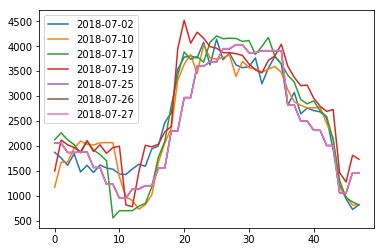

In [420]:
plot_power(data_scaler[birch.labels_==2], data_index[birch.labels_==2])


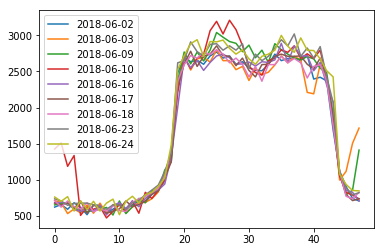

In [399]:
plot_power(data_scaler[birch.labels_==1], data_index[birch.labels_==1])

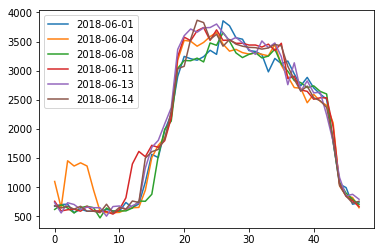

In [361]:
plot_power(data_scaler[knn.labels_==0], data_index[knn.labels_==0])

In [265]:
data_index[birch.labels_==2]

array(['2018-06-22', '2018-06-26', '2018-06-29'],
      dtype='<U10')

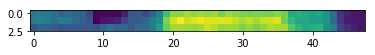

In [352]:
plt.imshow(data[np.isin(data.index.date.astype(str), data_index[birch.labels_==2])].values.reshape(-1, 48))

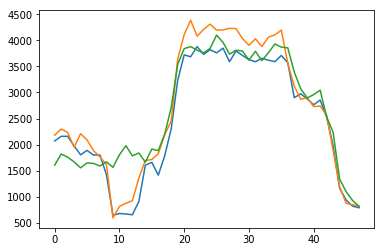

In [353]:
plt.plot(data[np.isin(data.index.date.astype(str), data_index[birch.labels_==2])].values.reshape(-1, 48)[0, :])
plt.plot(data[np.isin(data.index.date.astype(str), data_index[birch.labels_==2])].values.reshape(-1, 48)[1, :])
plt.plot(data[np.isin(data.index.date.astype(str), data_index[birch.labels_==2])].values.reshape(-1, 48)[2, :])

In [354]:
data_index[birch.labels_==2]

array(['2018-06-22', '2018-06-26', '2018-06-29'],
      dtype='<U10')

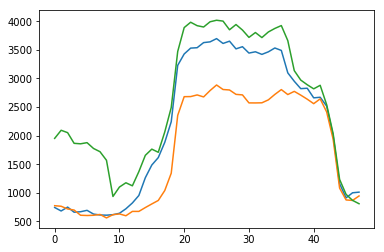

In [355]:
plt.plot(np.mean(data[np.isin(data.index.date.astype(str), data_index[birch.labels_==0])].values.reshape(-1, 48), axis=0))
plt.plot(np.mean(data[np.isin(data.index.date.astype(str), data_index[birch.labels_==1])].values.reshape(-1, 48), axis=0))
plt.plot(np.mean(data[np.isin(data.index.date.astype(str), data_index[birch.labels_==2])].values.reshape(-1, 48), axis=0))

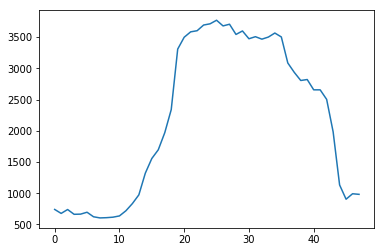

In [294]:
plt.plot(np.mean(data[np.isin(data.index.date.astype(str), data_index[birch.labels_==0])].values.reshape(-1, 48), axis=0))

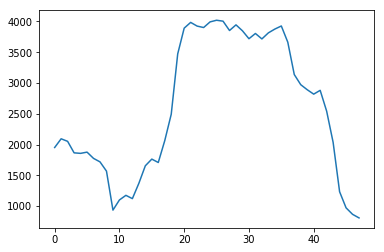

In [293]:
plt.plot(np.mean(data[np.isin(data.index.date.astype(str), data_index[birch.labels_==2])].values.reshape(-1, 48), axis=0))

In [275]:
data_index[birch.labels_==2]

array(['2018-06-22', '2018-06-26', '2018-06-29'],
      dtype='<U10')

In [276]:
data.index.date.as

array([datetime.date(2018, 6, 1), datetime.date(2018, 6, 1),
       datetime.date(2018, 6, 1), ..., datetime.date(2018, 7, 1),
       datetime.date(2018, 7, 1), datetime.date(2018, 7, 1)], dtype=object)

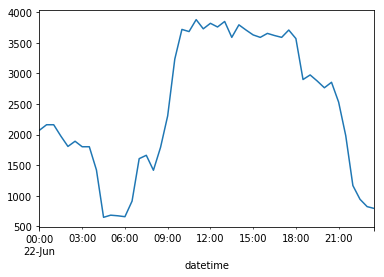

In [243]:
data["2018-06-22"].plot()

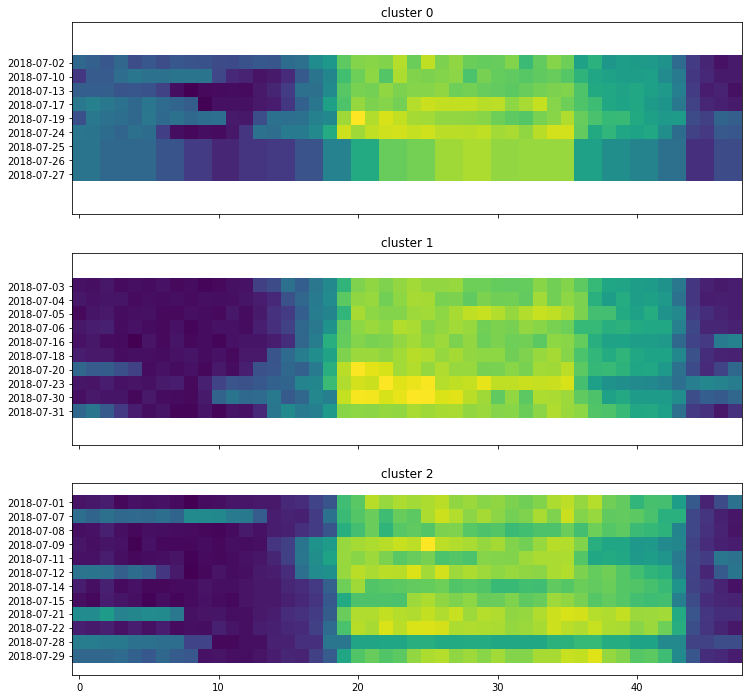

In [446]:
plot_cluster(data_scaler, data_index, knn.labels_)

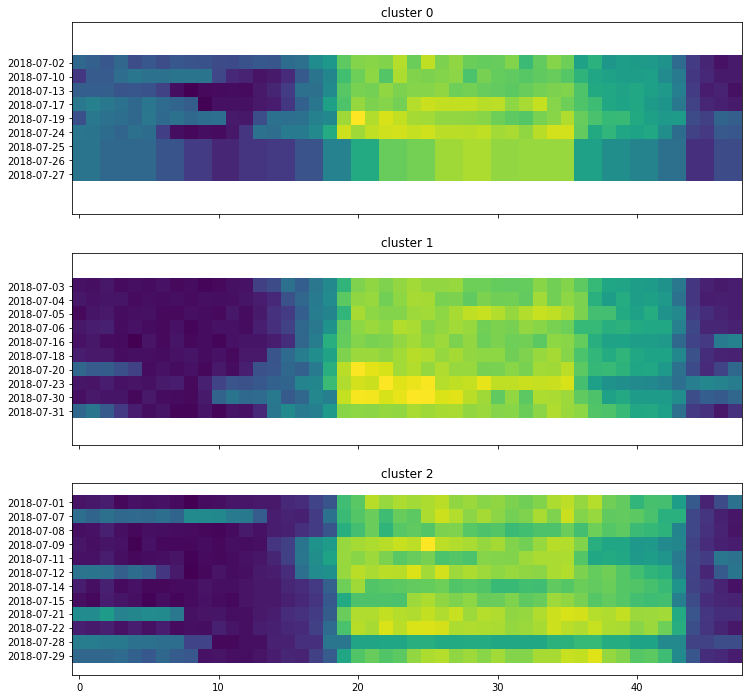

In [447]:
plot_cluster(data_scaler, data_index, knn.labels_)

In [298]:
data_index

array(['2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04',
       '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08',
       '2018-06-09', '2018-06-10', '2018-06-11', '2018-06-12',
       '2018-06-13', '2018-06-14', '2018-06-15', '2018-06-16',
       '2018-06-17', '2018-06-18', '2018-06-19', '2018-06-20',
       '2018-06-21', '2018-06-22', '2018-06-23', '2018-06-24',
       '2018-06-25', '2018-06-26', '2018-06-27', '2018-06-28',
       '2018-06-29', '2018-06-30', '2018-07-01'],
      dtype='<U10')

In [299]:
data_scaler

array([[ 0.03525641,  0.08333333,  0.10557185, ...,  0.5625    ,
         0.        ,  0.05167173],
       [ 0.        ,  0.0545977 ,  0.03519062, ...,  0.3375    ,
         0.02371542,  0.03343465],
       [ 0.05769231,  0.06896552,  0.        , ...,  0.8625    ,
         0.6284585 ,  0.64741641],
       ..., 
       [ 0.63141026,  0.72413793,  0.72140762, ...,  0.825     ,
         0.17391304,  0.10030395],
       [ 0.12820513,  0.08045977,  0.21407625, ...,  0.825     ,
         0.15019763,  0.10334347],
       [ 0.06089744,  0.11206897,  0.15542522, ...,  0.2       ,
         0.43083004,  0.64133739]])

In [300]:
def cos_similarity(target, standard):
    target = np.array(target)
    standard = np.array(standard)
    cos = (np.dot(target, standard)) / (np.linalg.norm(target) * np.linalg.norm(standard))
    return cos

In [307]:
pd.to_datetime(data_index).weekday

Int64Index([4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
            5, 6, 0, 1, 2, 3, 4, 5, 6],
           dtype='int64')

In [320]:
holiday = data_scaler[list(map(is_holiday, pd.to_datetime(data_index).weekday)), :]
workday = data_scaler[~np.array(list((map(is_holiday, pd.to_datetime(data_index).weekday)))).astype(bool), :]